# Prosper.com Loans: Exploring Relationships Affecting the Borrower's Interest Rate
## by Richard Steele

## Investigation Overview

> The goal of this inquiry was to determine which data from a borrower determined the interest rate charged for a loan through the Prosper Marketplace peer-to-peer lending facility

## Dataset Overview

> The data comprised the interest rates and other borrower-related data for 113,937 loans, which included income, credit scores, debt ratios, revolving-credit balances, and the number of open credit lines. A total of 36,360 loans were removed from analysis due to excess null values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loans = pd.read_csv(r'C:\Users\Richard\OneDrive\Documents\Data Science Courses\Data Analyst Course\DAND Project 4\ProsperLoanData.csv')
df_loans = df_loans[np.isfinite(df_loans['ProsperRating (numeric)'])]
df_loans = df_loans[np.isfinite(df_loans['DebtToIncomeRatio'])]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the Borrower Interest Rate

> Borrower interest rates have a wide range of values, from 4.00% to 36.00%. The distribution is unimodal, albeit the mode occurs in an unusual place at the right-hand tail.

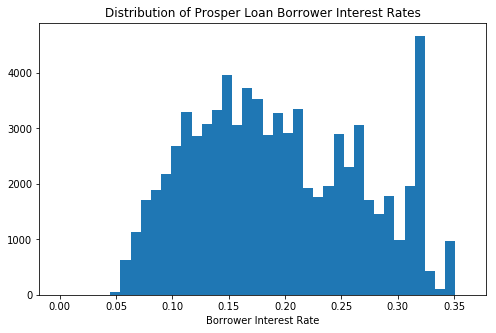

In [3]:
plt.figure(figsize=[8,5])
binsize = 0.0090
bins = np.arange(0, df_loans['BorrowerRate'].max()+binsize, binsize)

plt.hist(x='BorrowerRate', data = df_loans, bins = bins)
plt.title('Distribution of Prosper Loan Borrower Interest Rates')
plt.xlabel('Borrower Interest Rate')
plt.show();

## Distribution of Average Credit Scores

> The original data contained two columns for the lower and upper ranges of a borrower's credit scores. In order to ensure tidiness and ease of analysis, I computed the avaergae of the two because the distributions of the original two figures were nearly identical. This feature contained few outliers and an expected right skew.

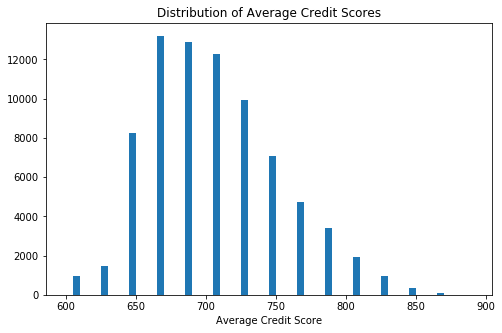

In [7]:
df_loans['AverageCreditScore'] = (df_loans['CreditScoreRangeUpper'] + df_loans['CreditScoreRangeLower'])/2

plt.figure(figsize=[8,5])
binsize = 5
bins = np.arange(600, df_loans['AverageCreditScore'].max()+binsize, binsize)

plt.hist(x='AverageCreditScore', data = df_loans, bins = bins)
plt.title('Distribution of Average Credit Scores')
plt.xlabel('Average Credit Score')
plt.show()

## Distribution of Numeric Prosper Ratings

> The distribution has a very slight right skew, yet the mode is extremely close to the mean.

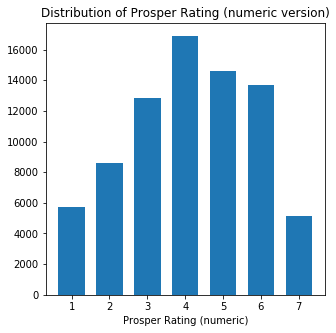

In [8]:
plt.figure(figsize=[5,5])
binsize = 1
bins = np.arange(0.5, df_loans['ProsperRating (numeric)'].max()+binsize, binsize)

plt.hist(x='ProsperRating (numeric)', data = df_loans, bins = bins, rwidth = 0.7)
plt.xlabel('Prosper Rating (numeric)')
plt.title('Distribution of Prosper Rating (numeric version)')
plt.xticks(np.arange(1, 7+1, 1))
plt.show()

## Borrower Interest Rate versus Prosper Rating

> The relationship is clearly linear, unlike any other relationship explored; Prosper rating is the "main ingredient" in determining the interest rate.

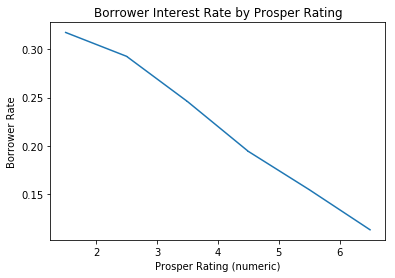

In [6]:
bin_size = 1
xbin_edges = np.arange(0, df_loans['ProsperRating (numeric)'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['ProsperRating (numeric)'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['BorrowerRate'].groupby(data_xbins).mean()
y_sems = df_loans['BorrowerRate'].groupby(data_xbins).sem()

plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.title('Borrower Interest Rate by Prosper Rating')
plt.ylabel('Borrower Rate')
plt.xlabel('Prosper Rating (numeric)')
plt.xticks();

## Prosper Rating Across Average Credit Scores

> This gives a indication of how credit scores figure into the Prosper rating, and by extension, the borrower interest rate. As with the previous slide, the near-absence of error bars demonstrates the certainty of the relationship.

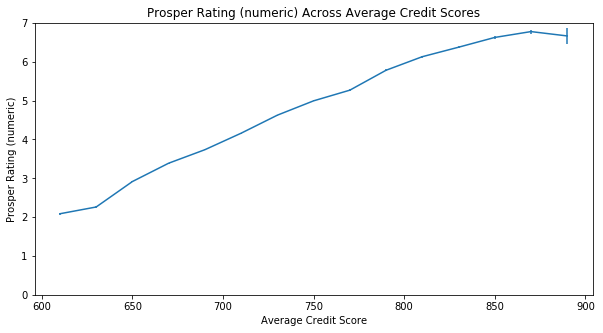

In [7]:
plt.figure(figsize=[10,5])

bin_size = 20
xbin_edges = np.arange(0, df_loans['AverageCreditScore'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['AverageCreditScore'], xbin_edges, right=False, include_lowest=True)

y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()

plt.errorbar(x=xbin_centers, y=y_means, yerr = y_sems)
plt.ylim(0,7)
plt.title('Prosper Rating (numeric) Across Average Credit Scores')
plt.ylabel('Prosper Rating (numeric)')
plt.xlabel('Average Credit Score')
plt.xticks();

## Effect of Income Range on Borrower Rate and Prosper Rating

> The medians show a predictable relationship between the variables, i.e., the higher the income, the more creditworthy the borrower. However, the width of the IRQs and whisker lengths highlight the possibility of risk despite the income level.

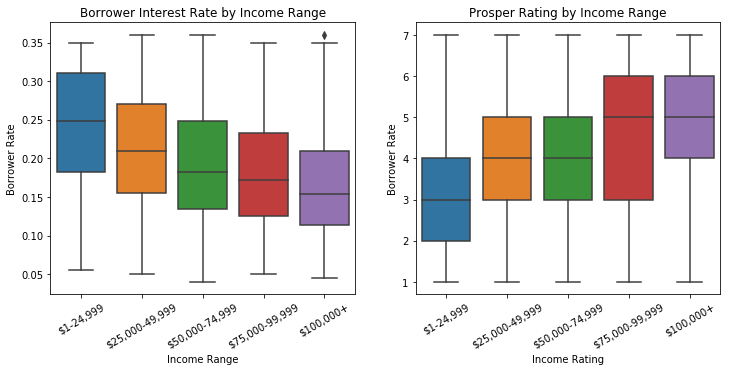

In [8]:
plt.figure(figsize=[12,5])

tick_order = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

plt.subplot(1,2,1)
sb.boxplot(data=df_loans, x='IncomeRange', y='BorrowerRate', order=tick_order)
plt.title('Borrower Interest Rate by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=30)

plt.subplot(1,2,2)
sb.boxplot(data=df_loans, x='IncomeRange', y='ProsperRating (numeric)', order=tick_order)
plt.title('Prosper Rating by Income Range')
plt.xlabel('Income Rating')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=30);

## Prosper Rating Across Debt-to-Income Ratio and Average Credit Score

> Here we see that the average credit score has a much greater influence on the Prosper rating than the debit-to-income ratio, which after a value of just over 2.0 becomes unimportant, and shows errorbars to reflect uncertainty in measurement.


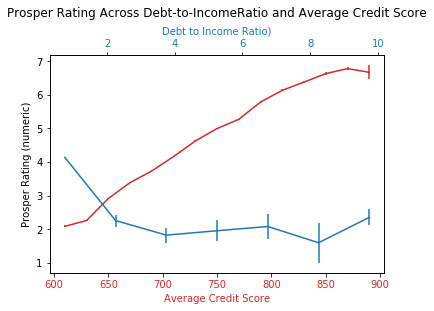

In [9]:
fig, ax1 = plt.subplots()


bin_size = 20
xbin_edges1 = np.arange(0, df_loans['AverageCreditScore'].max()+bin_size, bin_size)
xbin_centers1 = (xbin_edges1 + bin_size/2)[:-1]

data_xbins1 = pd.cut(df_loans['AverageCreditScore'], xbin_edges1, right=False, include_lowest=True)
y_means1 = df_loans['ProsperRating (numeric)'].groupby(data_xbins1).mean()
y_sems1 = df_loans['ProsperRating (numeric)'].groupby(data_xbins1).sem()

color1 = 'tab:red'
ax1.set_xlabel('Average Credit Score', color=color1)
ax1.set_ylabel('Prosper Rating (numeric)')
plt.errorbar(x=xbin_centers1, y=y_means1, yerr=y_sems1, color=color1)
#ax1.set_xticks(np.arange(0, 900, 50))
ax1.tick_params(axis='x', labelcolor=color1)

ax2 = ax1.twiny()

bin_size = 1.5
xbin_edges = np.arange(0, df_loans['DebtToIncomeRatio'].max()+bin_size, bin_size)
xbin_centers = (xbin_edges + bin_size/2)[:-1]

data_xbins = pd.cut(df_loans['DebtToIncomeRatio'], xbin_edges, right=False, include_lowest=True)
y_means = df_loans['ProsperRating (numeric)'].groupby(data_xbins).mean()
y_sems = df_loans['ProsperRating (numeric)'].groupby(data_xbins).sem()

plt.errorbar(x = xbin_centers, y = y_means, yerr = y_sems)
plt.ylabel('Prosper Rating (numeric)')
plt.xlabel('Debt to Income Ratio)', color='tab:blue')
plt.xticks(color='tab:blue')

plt.title('Prosper Rating Across Debt-to-IncomeRatio and Average Credit Score', y = 1.15);

## Influence of Income and Credit Score on Prosper Rating

> Income levels move in tandem with the credit score when plotted against the Prosper rsting, showing the tight relationship among all three variables. Note how the lines descend with the lower income ranges.

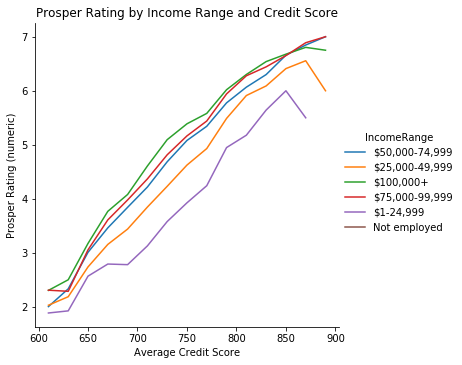

In [10]:
def mean_poly(x, y, bins = 20, **kwargs):
    # This custom-adapts the line plot code,
    # first by setting the bin edges if none exist or are int specified:
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), 1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
    
    # This computes the counts.
    data_bins = pd.cut(x, bins, right = False, include_lowest = True)
    means = y.groupby(data_bins).mean()
    
    # This creates the plot itself.
    plt.errorbar(x = bin_centers, y = means, **kwargs)
    
bin_edges = np.arange(0, df_loans['AverageCreditScore'].max() + 20, 20)
    
g = sb.FacetGrid(data = df_loans, hue = 'IncomeRange', size = 5)
g.map(mean_poly, "AverageCreditScore", "ProsperRating (numeric)", bins = bin_edges)
plt.xlabel('Average Credit Score')
plt.ylabel('Prosper Rating (numeric)')
plt.title('Prosper Rating by Income Range and Credit Score')
g.add_legend();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!